In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from numpy.linalg import inv
from scipy.linalg import eigh
import matplotlib.cm as cm

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

# CIFAR-10

## Load Dataset

In [2]:
import pickle
import os
import platform

classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 32, 32, 3) #np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=10000):
    # Load the raw CIFAR-10 data
    cifar10_dir = "cifar-10-batches-py/"
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    x_train = X_train.astype('float32')
    x_test = X_test.astype('float32')

    x_train /= 255
    x_test /= 255

    return x_train, y_train, X_val, y_val, x_test, y_test

x_train, y_train, X_val, y_val, x_test, y_test = get_CIFAR10_data()

for i in range(x_train.shape[0]):
    x_train[i] = np.transpose(x_train[i].reshape(3,32,32), (1,2,0))

In [5]:
print("Using {} training samples, {} validation samples and {} test samples.".format(len(x_train), len(X_val), len(x_test)))

Using 49000 training samples, 1000 validation samples and 10000 test samples.


## Visualize 10 samples

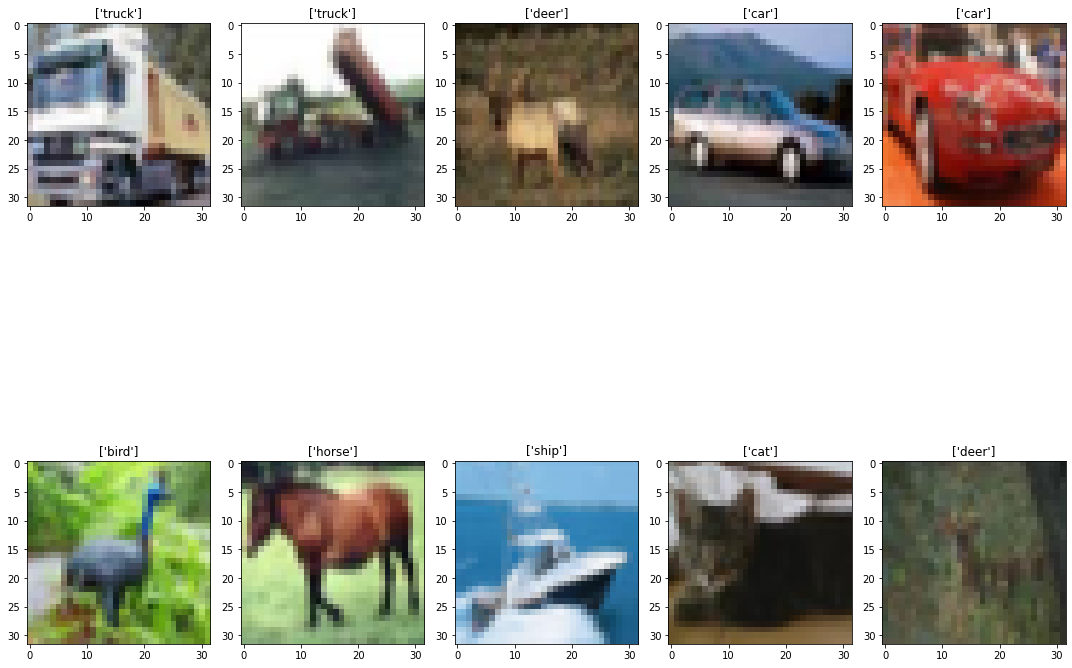

In [7]:
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i, title=[classes[y_train[i]]])
    plt.imshow(x_train[i])
fig.tight_layout()
plt.show()

## Visualize average for each class

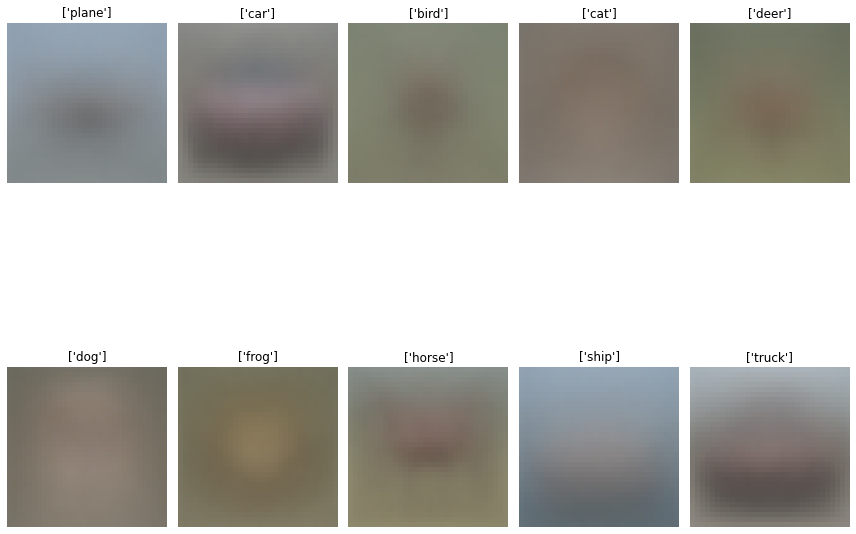

In [8]:
avg = np.mean(x_train, axis=0)
tmp = [[] for _ in range(10)]


for i in range(len(x_train)):
    tmp[y_train[i]].append(x_train[i])

avgs = [np.mean(cat, axis=0) for cat in tmp]

# Visualising some samples #
fig=plt.figure(figsize=(12, 12))
columns = 5
rows = 2
for i in range(0, columns*rows):
    ax = fig.add_subplot(rows, columns, i+1, title=[classes[i]])
    ax.axis("off")
    plt.imshow(avgs[i], interpolation='nearest')
fig.tight_layout()
plt.show()

## Visualize mean difference between average for each class

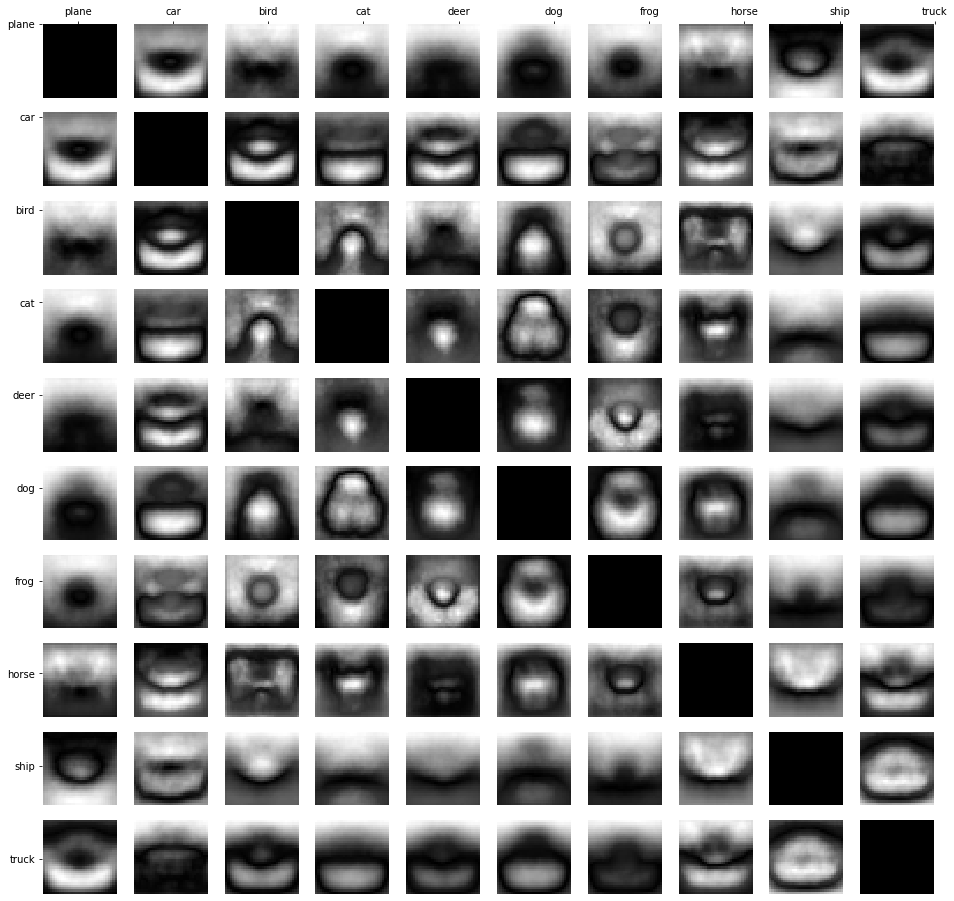

In [10]:
# Visualising some samples #
#fig=plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(16,16))
columns = 10
rows = 10

# Set ticks and label them
ax.set_xticks(np.linspace(0.4, 10, num=10))
ax.set_yticks(np.linspace(0.4, 10, num=10))
ax.set_xticklabels(classes)
ax.set_yticklabels(list(reversed(classes)))

ax.set_frame_on(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('top')

for j in range(columns):
    for i in range(rows):
        ax = fig.add_subplot(rows, columns, j*columns+i+1)
        ax.axis("off")
        dif = np.absolute(avgs[j] - avgs[i])
        plt.imshow(dif.mean(axis=2), cmap='gray', interpolation='nearest')
#fig.tight_layout()
plt.show()

# word2vec

## Loading the Data

In [13]:
import gensim

In [14]:
model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)  

In [15]:
vectors = model.vectors
print(vectors.shape)

(3000000, 300)


In [24]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7118192911148071)]

In [23]:
model.most_similar(positive=['asia', 'germany'], negative=['china'], topn=1)

[('europe', 0.5927505493164062)]

In [30]:
model.most_similar(positive=['planet', 'human'], negative=[], topn=3)

[('humankind', 0.6907055377960205),
 ('mankind', 0.6753630042076111),
 ('Earth', 0.6270484924316406)]

In [47]:
model.most_similar(positive=['violin', 'music'], negative=['saxophone'], topn=1)

[('classical_music', 0.6941146850585938)]

In [48]:
model.most_similar(positive=['saxophone', 'music'], negative=['violin'], topn=1)

[('jazz', 0.6269402503967285)]

In [49]:
model.similarity('man', 'woman')

0.76640123

In [50]:
model.similarity('dog', 'cat')

0.76094574

In [51]:
model.similarity('sun', 'moon')

0.4262834

In [61]:
model.similarity('sun', 'star')

0.2271634

In [53]:
model.similarity('earth', 'mars')

0.041807365

In [55]:
model.similarity('Earth', 'Mars')

0.56770074

In [52]:
model.similarity('germany', 'france')

0.6314354

In [60]:
model.most_similar(positive=['Nietzsche', 'France'], negative=['Germany'], topn=3)

[('Montaigne', 0.6276372075080872),
 ('Roland_Barthes', 0.6018049120903015),
 ('philosopher_Blaise_Pascal', 0.5992623567581177)]